In [1]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline
import numpy as np
import pandas
import json
from PIL import Image, ImageDraw
import cPickle as pkl
from matplotlib.colors import LogNorm
from tqdm import tqdm_notebook as tqdm
from  scipy.spatial import distance

In [2]:
from infer import InferUtil
iu = InferUtil('ckpt/model-99001')

inception_prep no aug
INFO:tensorflow:Restoring parameters from ckpt/model-99001


In [3]:
cls_id = pkl.load(file('../common/class_id_map.pkl', 'rb'))

In [13]:
cls = 'pig'

In [14]:
_tmp = pandas.read_csv('../../data_all/%s.csv'%cls)
n = len(_tmp)

tmp_list = []
img_list = []

best_strokes = []
for val_idx in tqdm(range(n-10000, n)):
    strokes = json.loads(_tmp.iloc[val_idx,1])

    ns = len(strokes)
    prev_prob = 0.
    best_stroke = None
    max_inc = -1e3
    
    image = Image.new("P", (128,128), color=255)
    image_draw = ImageDraw.Draw(image)
    for stroke in strokes:
        
        ss = np.array(stroke)/2
        for i in range(len(ss[0])-1):
            image_draw.line([ss[0][i], 
                             ss[1][i],
                             ss[0][i+1], 
                             ss[1][i+1]],
                            fill=0, width=3)

        _, probs = iu.ext(np.array(image))
        prob = probs[0][cls_id[cls]]
        prob_inc = prob - prev_prob
        if prob_inc > max_inc:
            max_inc = prob_inc
            best_stroke = ss
    best_strokes.append(best_stroke)

In [15]:
tot = np.zeros((128,128), dtype=np.float32)
for oss in best_strokes:
    image = Image.new("P", (128,128), color=255)
    image_draw = ImageDraw.Draw(image)
    #ss = oss - np.min(oss, axis=1)[:,None]
    ss = oss
    for i in range(len(ss[0])-1):
        image_draw.line([ss[0][i], 
                         ss[1][i],
                         ss[0][i+1], 
                         ss[1][i+1]],
                        fill=0, width=3)
        
    image = np.array(image)
    image = (255-image) / 255.
    #print image.shape, tot.shape
    tot += image
tot /= len(best_strokes)

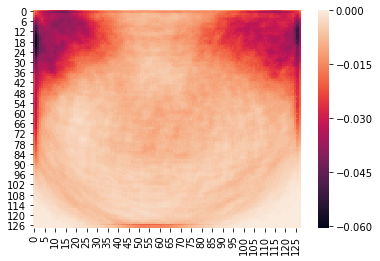

In [16]:
sns.heatmap(1-np.exp(tot))

10


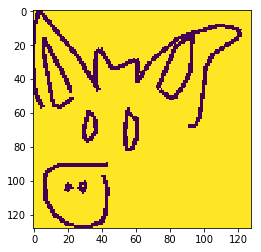

In [17]:
_tmp = pandas.read_csv('../../data_all/pig.csv')
strokes = json.loads(_tmp.iloc[20008,1])
print len(strokes)

image = Image.new("P", (256,256), color=255)
image_draw = ImageDraw.Draw(image)
for stroke in strokes:
    for i in range(len(stroke[0])-1):
        image_draw.line([stroke[0][i], 
                         stroke[1][i],
                         stroke[0][i+1], 
                         stroke[1][i+1]],
                        fill=0, width=5)
image = image.resize((128,128))
imshow(np.asarray(image))